## Fetch Data and Data Cleaning

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data with headers
headers = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight",
           "Accelaration", "Model_Year", "Origin", "Car_Name"]

data = pd.read_table('auto-mpg.txt', delimiter = '\t', names=headers)
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model_Year,Origin,Car_Name
0,18.0 8 307.0 130.0 3504. 12...,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0 8 350.0 165.0 3693. 11...,buick skylark 320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0 8 318.0 150.0 3436. 11...,plymouth satellite,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.0 8 304.0 150.0 3433. 12...,amc rebel sst,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0 8 302.0 140.0 3449. 10...,ford torino,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
393,27.0 4 140.0 86.00 2790. 15...,ford mustang gl,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,44.0 4 97.00 52.00 2130. 24...,vw pickup,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,32.0 4 135.0 84.00 2295. 11...,dodge rampage,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,28.0 4 120.0 79.00 2625. 18...,ford ranger,NaN,NaN,NaN,NaN,NaN,NaN,NaN


there was not use a suitable delimiter in the txt file therefore, we need to read the data using different strategies

In [3]:
# read the data again without headers
data = pd.read_table('auto-mpg.txt', header=None)
data

,0,1
0,18.0 8 307.0 130.0 3504. 12...,chevrolet chevelle malibu
1,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
2,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
3,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
4,17.0 8 302.0 140.0 3449. 10...,ford torino
...,...,...
393,27.0 4 140.0 86.00 2790. 15...,ford mustang gl
394,44.0 4 97.00 52.00 2130. 24...,vw pickup
395,32.0 4 135.0 84.00 2295. 11...,dodge rampage
396,28.0 4 120.0 79.00 2625. 18...,ford ranger


In [4]:
# create Car_Name column
Car_Name_Column = data.iloc[:, 1]

# split the data for other columns
data = pd.DataFrame(data.iloc[:, 0].str.split(expand=True))
data

,0,1,2,3,4,5,6,7
0,18.0,8,307.0,130.0,3504.,12.0,70,1
1,15.0,8,350.0,165.0,3693.,11.5,70,1
2,18.0,8,318.0,150.0,3436.,11.0,70,1
3,16.0,8,304.0,150.0,3433.,12.0,70,1
4,17.0,8,302.0,140.0,3449.,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1
394,44.0,4,97.00,52.00,2130.,24.6,82,2
395,32.0,4,135.0,84.00,2295.,11.6,82,1
396,28.0,4,120.0,79.00,2625.,18.6,82,1


In [5]:
# concat the whole data
data = pd.concat([data, Car_Name_Column], axis=1)
data

,0,1,2,3,4,5,6,7,1
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1,ford mustang gl
394,44.0,4,97.00,52.00,2130.,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.,18.6,82,1,ford ranger


In [6]:
# rename the columns
data.set_axis(["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", 
               "Accelaration", "Model_Year", "Origin", "Car_Name"], axis='columns', inplace=True)
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model_Year,Origin,Car_Name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1,ford mustang gl
394,44.0,4,97.00,52.00,2130.,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.,18.6,82,1,ford ranger


In [7]:
# checking if there is any NULL data 
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Accelaration    0
Model_Year      0
Origin          0
Car_Name        0
dtype: int64

In [8]:
# there are "?" in 'Horsepower' column, it does not see as null value, we need to find and change it as null
data[data.eq("?").any(1)]

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model_Year,Origin,Car_Name
32,25.0,4,98.00,?,2046.,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.,17.0,74,1,ford maverick
330,40.9,4,85.00,?,1835.,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.,20.5,82,1,amc concord dl


In [9]:
# change "?" as null value in data
data['Horsepower'] = data['Horsepower'].replace(['?'], None)

In [10]:
# again check NULL data number 
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Accelaration    0
Model_Year      0
Origin          0
Car_Name        0
dtype: int64

In [11]:
# dataset is ready to save
# save the dataset as csv file
data.to_csv('auto-mpg.csv', index=False)

In [12]:
data = pd.read_csv("auto-mpg.csv")
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model_Year,Origin,Car_Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [13]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Accelaration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car_Name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [14]:
# change the Cylinders and Model_Year columns Dtype as object
convert_dict = {'Cylinders': object,
                'Model_Year': object,
                'Origin': object}
 
data = data.astype(convert_dict)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    object 
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Accelaration  398 non-null    float64
 6   Model_Year    398 non-null    object 
 7   Origin        398 non-null    object 
 8   Car_Name      398 non-null    object 
dtypes: float64(5), object(4)
memory usage: 28.1+ KB


In [15]:
# checking if there is any NULL data 
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Accelaration    0
Model_Year      0
Origin          0
Car_Name        0
dtype: int64

In [16]:
# fill the null values
# fill in the missing data in the Horsepower column according to the Cylinders average.
unique_Cylinders = pd.unique(data.Cylinders)
print(f"number of Unique Cylinders: {len(unique_Cylinders)}")
unique_Cylinders[:10]

# find Horsepower averages in Cylinders specific
# Equalize the average Horsepower values to the missing values in Horsepower specific to Cylinders
temp_data = data.copy()  # set temp_data variable to avoid losing real data
Horsepower = ["Horsepower"] # it can be add more column
for c in unique_Cylinders:
    
    # create Cylinders filter
    Cylinders_filtre = temp_data.Cylinders == c
    # filter data by Cylinders
    fitered_data = temp_data[Cylinders_filtre]
    
    # find average for Horsepower in Cylinders
    for s in Horsepower:
        mean = np.round(np.mean(fitered_data[s]),2)
        if ~np.isnan(mean): # if Cylinders property has average
            fitered_data[s] = fitered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Cylinders:{c}")
        else: # find average for all data if no average in Cylinders
            all_data_mean = np.round(np.mean(data[s]),2)
            fitered_data[s] = fitered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean} when Cylinders:{c}")
    # Synchronize data filled with missing values in Horsepower to data temporary            
    temp_data[Cylinders_filtre] = fitered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 
data.info()

number of Unique Cylinders: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    object 
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Accelaration  398 non-null    float64
 6   Model_Year    398 non-null    object 
 7   Origin        398 non-null    object 
 8   Car_Name      398 non-null    object 
dtypes: float64(5), object(4)
memory usage: 28.1+ KB


In [17]:
# checking the NULL data again
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Accelaration    0
Model_Year      0
Origin          0
Car_Name        0
dtype: int64

In [18]:
Origin_names = []
for i in data["Origin"]:
    if i == 1:
        i = "American"
        Origin_names.append(i)
    elif i == 2:
        i = "European"
        Origin_names.append(i)
    else:
        i = "Japanese"
        Origin_names.append(i)
data["Origin"] = Origin_names
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model_Year,Origin,Car_Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,American,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,American,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,European,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,American,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,American,ford ranger


## Explotary Data Analysis and Data Visualization

In [19]:
# statistical information about data
data.describe()

,MPG,Displacement,Horsepower,Weight,Accelaration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.132940,2970.424623,15.568090
std,7.815984,104.269838,38.310897,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000
50%,23.000000,148.500000,92.000000,2803.500000,15.500000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


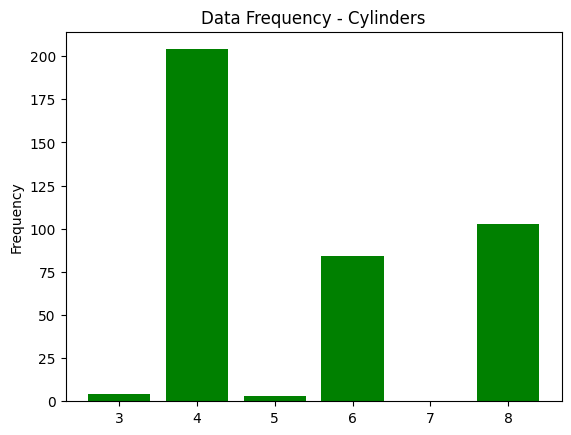

Number of Cylinders 
4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64


In [20]:
# Number of Sample according to Cylinders
plt.figure()
plt.bar(data["Cylinders"].value_counts().index, data["Cylinders"].value_counts(), color = "g")
#plt.xticks(data["Cylinders"].values)
plt.ylabel("Frequency")
plt.title("Data Frequency - Cylinders")
plt.show()
print(f"Number of Cylinders \n{data['Cylinders'].value_counts()}")

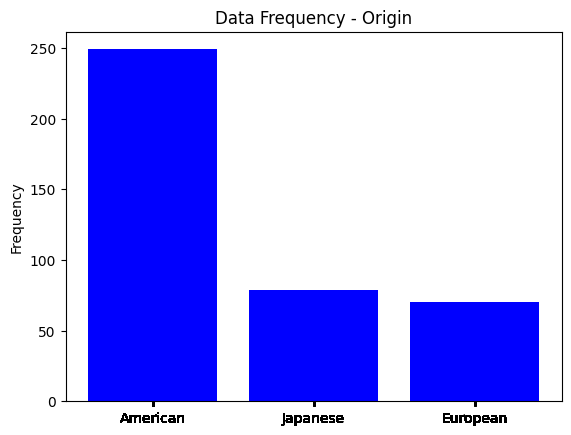

Number of Origin 
American    249
Japanese     79
European     70
Name: Origin, dtype: int64


In [21]:
# Number of Sample according to Origin
plt.figure()
plt.bar(data["Origin"].value_counts().index, data["Origin"].value_counts(), color = "b")
plt.xticks(data["Origin"].values)
plt.ylabel("Frequency")
plt.title("Data Frequency - Origin")
plt.show()
print(f"Number of Origin \n{data['Origin'].value_counts()}")

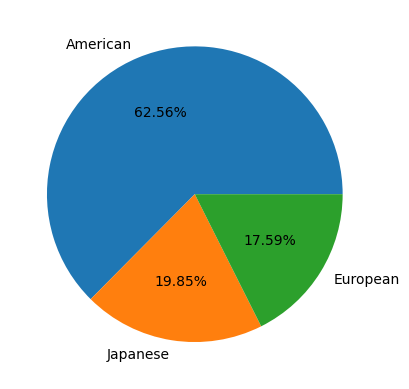

In [22]:
# plot a pie chart and see percentages of Conclusion
plt.pie(data['Origin'].value_counts(), labels=data['Origin'].unique(), autopct='%1.2f%%')
plt.show() 

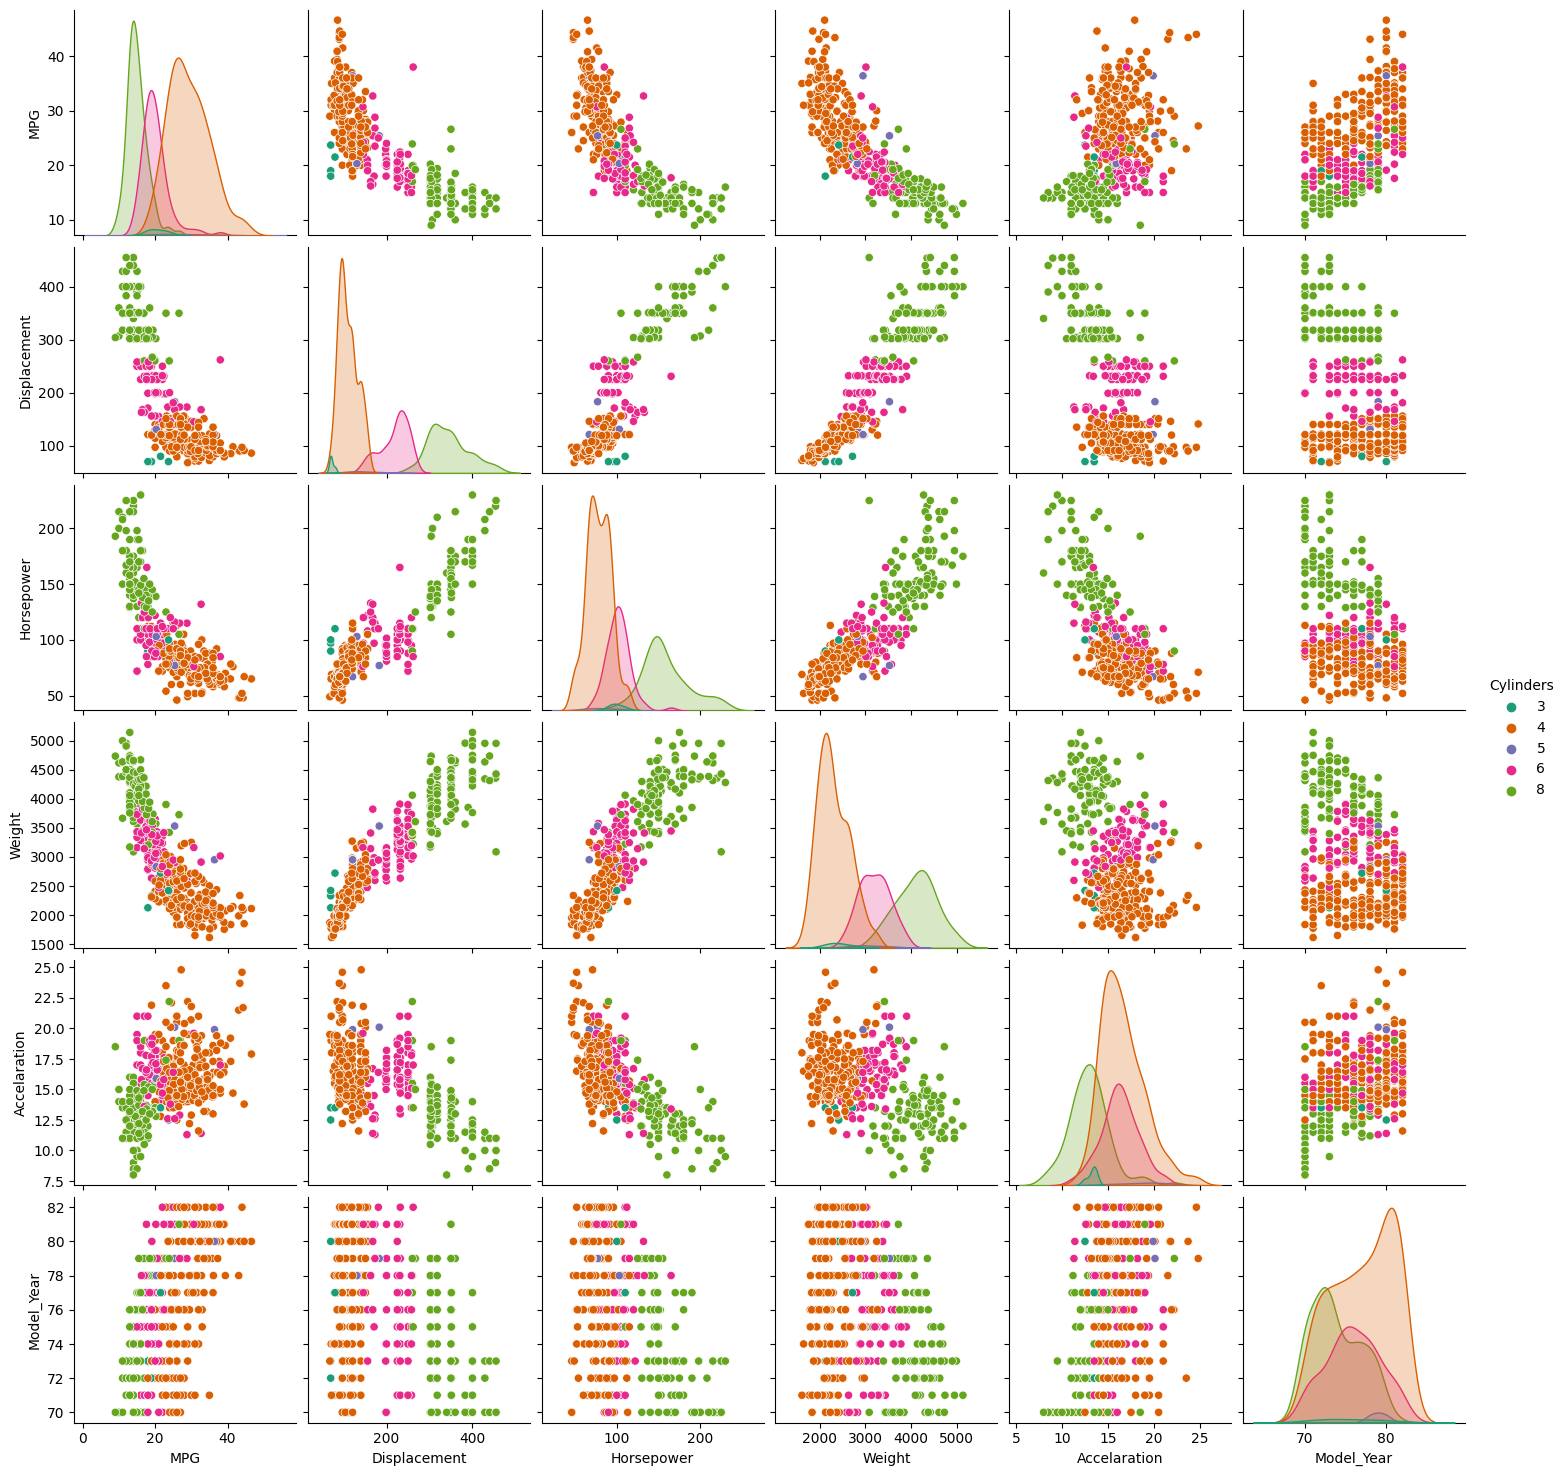

In [23]:
# see pairplot for relation between the columns
sns.pairplot(data, hue="Cylinders", palette='Dark2')
plt.show()

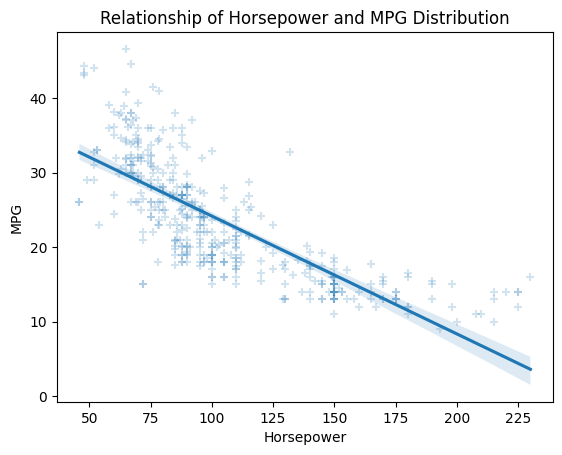

In [24]:
sns.regplot(x='Horsepower', y='MPG', data=data, marker="+", scatter_kws={'alpha':0.2})
plt.title('Relationship of Horsepower and MPG Distribution')
plt.show()

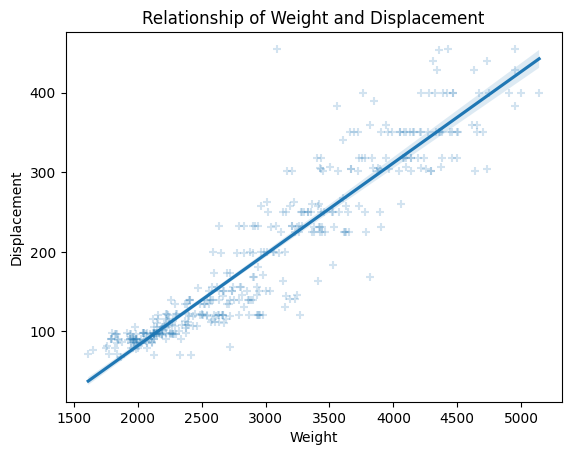

In [25]:
sns.regplot(x='Weight', y='Displacement', data=data, marker="+", scatter_kws={'alpha':0.2})
plt.title('Relationship of Weight and Displacement')
plt.show()

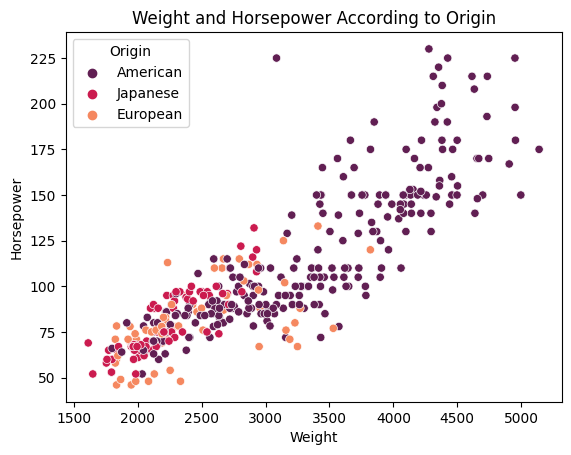

In [26]:
sns.scatterplot(x='Weight', y='Horsepower', hue='Origin', data=data, palette = "rocket")
plt.title('Weight and Horsepower According to Origin')
plt.show()

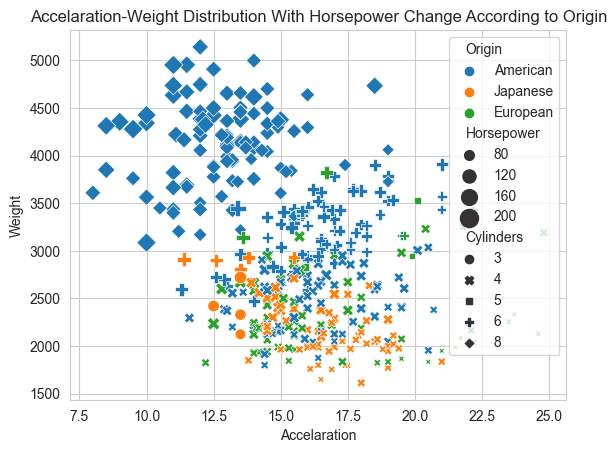

In [27]:
sns.set_style("whitegrid")
sns.scatterplot(x="Accelaration", y="Weight", hue="Origin", style="Cylinders", size="Horsepower", sizes=(15,200), data=data)
plt.xlabel("Accelaration")
plt.ylabel("Weight")
plt.title("Accelaration-Weight Distribution With Horsepower Change According to Origin")
plt.show()

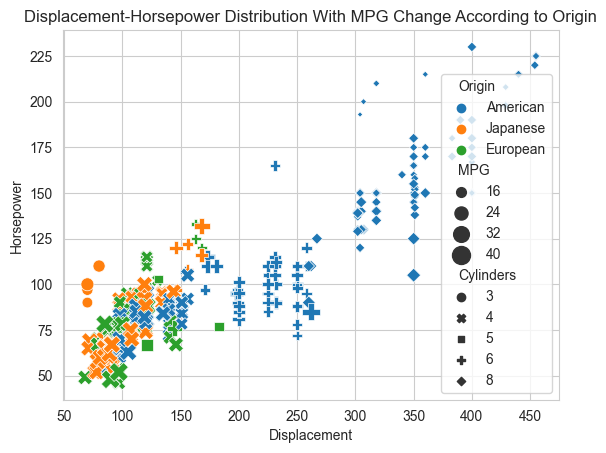

In [28]:
sns.set_style("whitegrid")
sns.scatterplot(x="Displacement", y="Horsepower", hue="Origin", style="Cylinders", size="MPG", sizes=(15,200), data=data)
plt.xlabel("Displacement")
plt.ylabel("Horsepower")
plt.title("Displacement-Horsepower Distribution With MPG Change According to Origin")
plt.show()

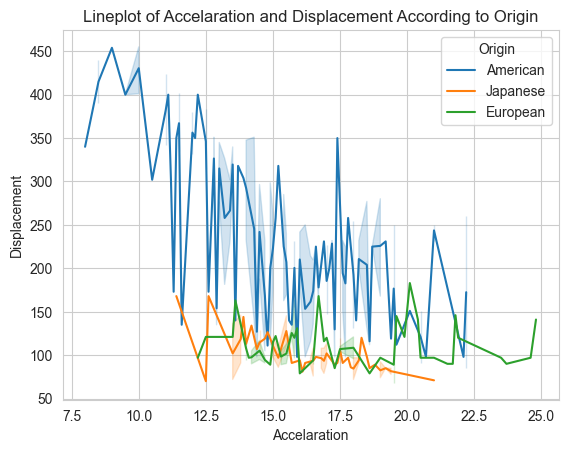

In [29]:
sns.lineplot(x='Accelaration', y='Displacement', hue='Origin', data=data)
plt.title('Lineplot of Accelaration and Displacement According to Origin')
plt.show()

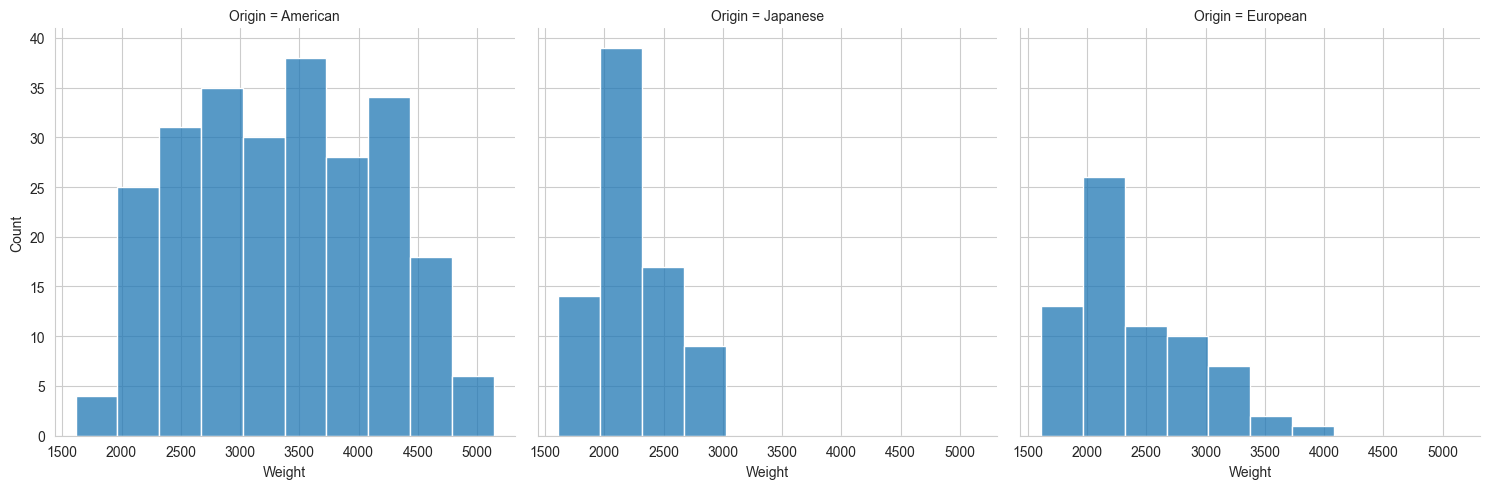

In [30]:
sns.displot(data, x="Weight", col="Origin", multiple="dodge")
plt.show()

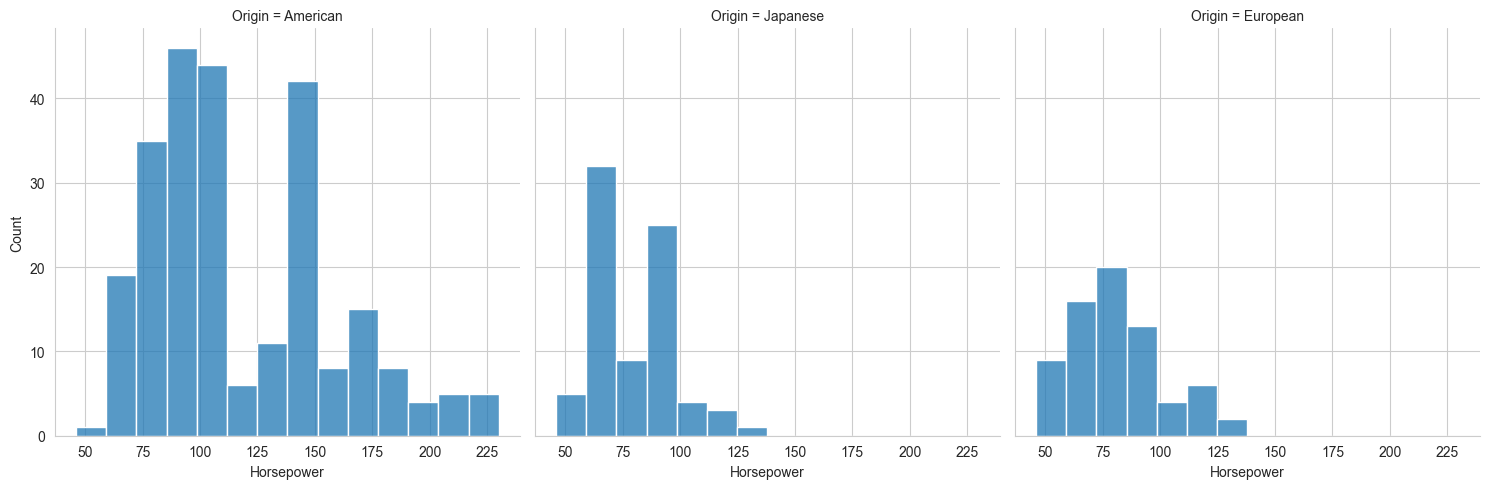

In [31]:
sns.displot(data, x="Horsepower", col="Origin", multiple="dodge")
plt.show()

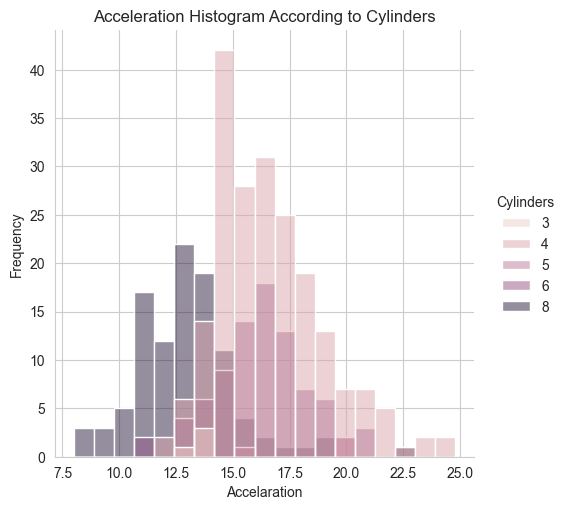

In [32]:
sns.displot(data, x="Accelaration", hue="Cylinders")
plt.ylabel("Frequency")
plt.title("Acceleration Histogram According to Cylinders")
plt.show()

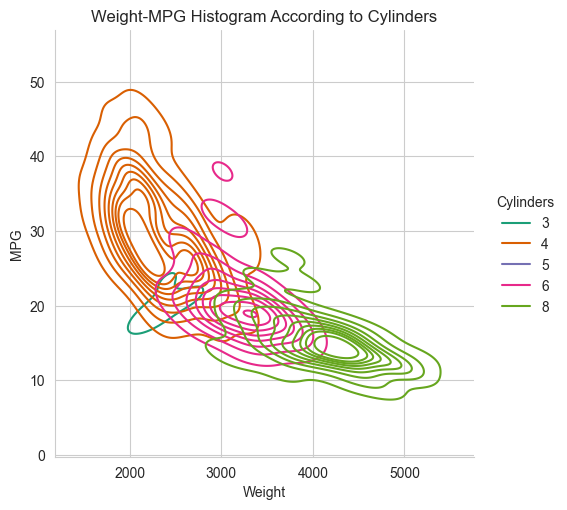

In [33]:
sns.displot(data, x="Weight", y="MPG", hue="Cylinders", kind="kde", palette="Dark2")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Weight-MPG Histogram According to Cylinders")
plt.show()

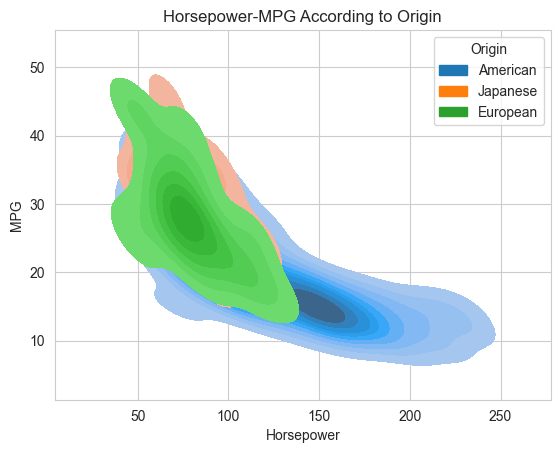

In [34]:
sns.kdeplot(data=data, x="Horsepower", y="MPG", hue="Origin", fill = True)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Horsepower-MPG According to Origin")
plt.show()

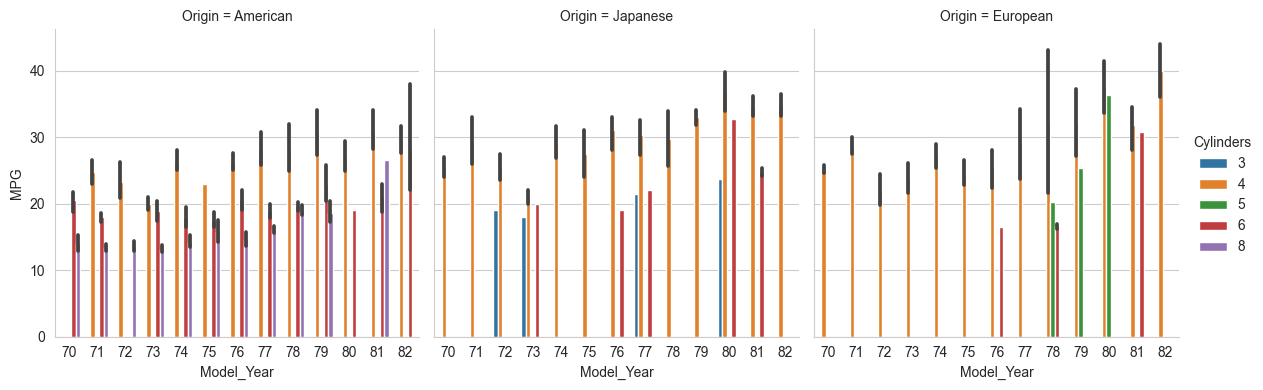

In [35]:
sns.catplot(x="Model_Year", y="MPG",  hue="Cylinders", col="Origin",
                data=data, kind="bar",height=4)
plt.show()

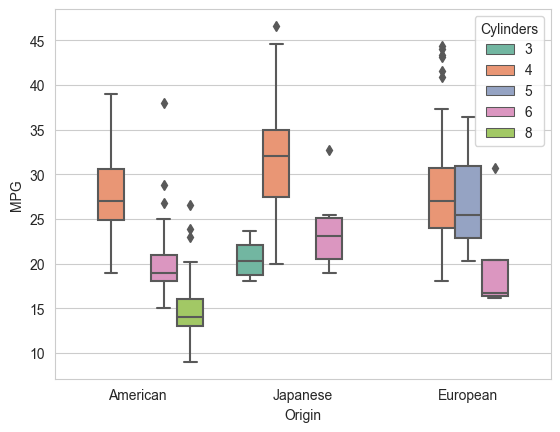

In [36]:
sns.boxplot(x="Origin", y="MPG", hue="Cylinders",data=data, palette="Set2")
plt.show()

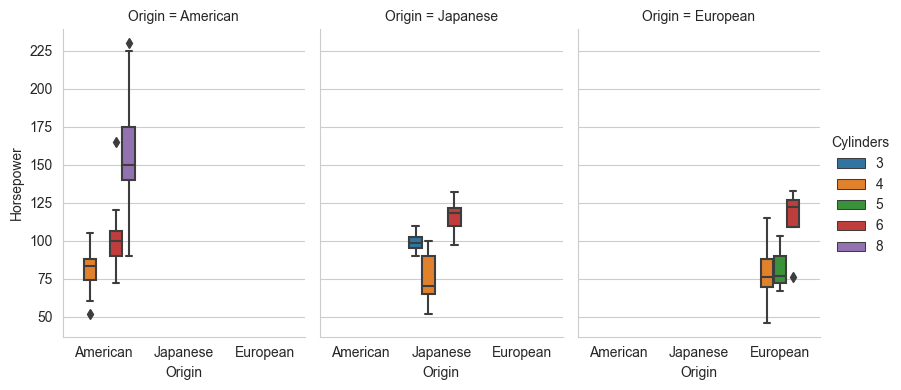

In [37]:
sns.catplot(x="Origin", y="Horsepower", hue="Cylinders", col="Origin",
            data=data, kind="box",height=4, aspect=.7);

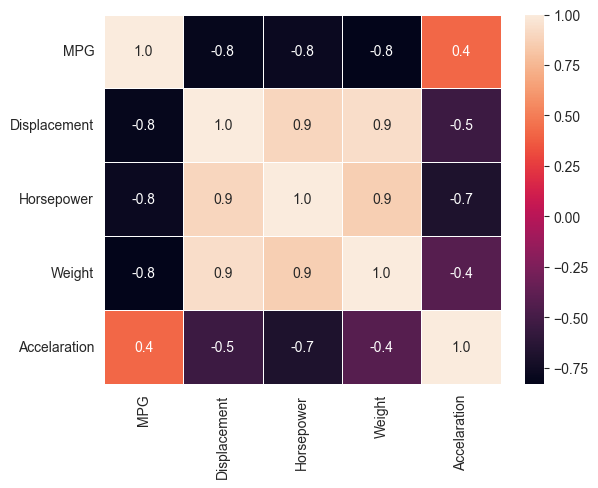

In [38]:
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

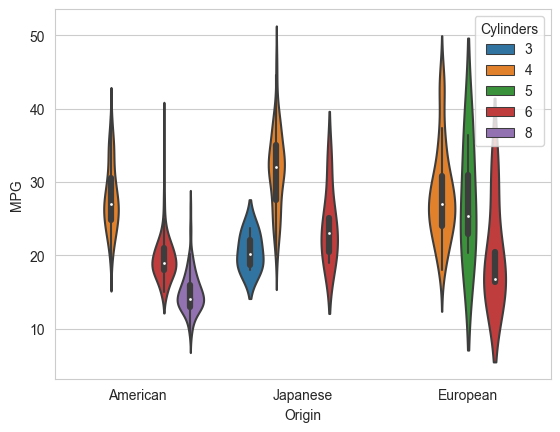

In [39]:
sns.violinplot(x="Origin", y="MPG", data=data, hue="Cylinders")
plt.show()

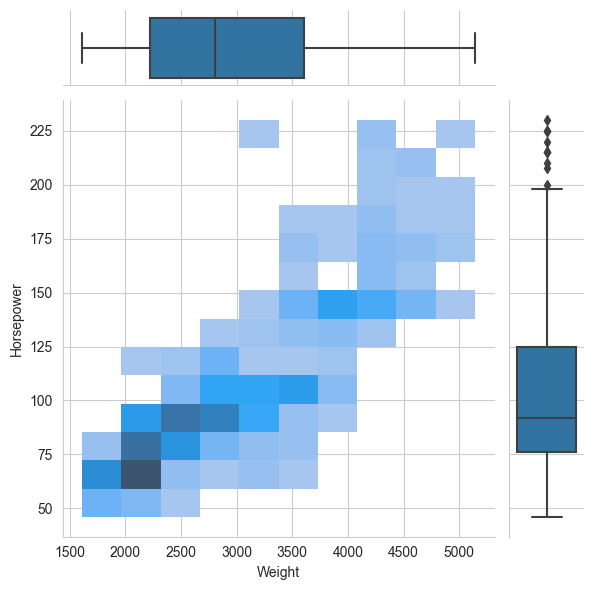

In [40]:
g = sns.JointGrid(data=data, x="Weight", y="Horsepower")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
plt.show()

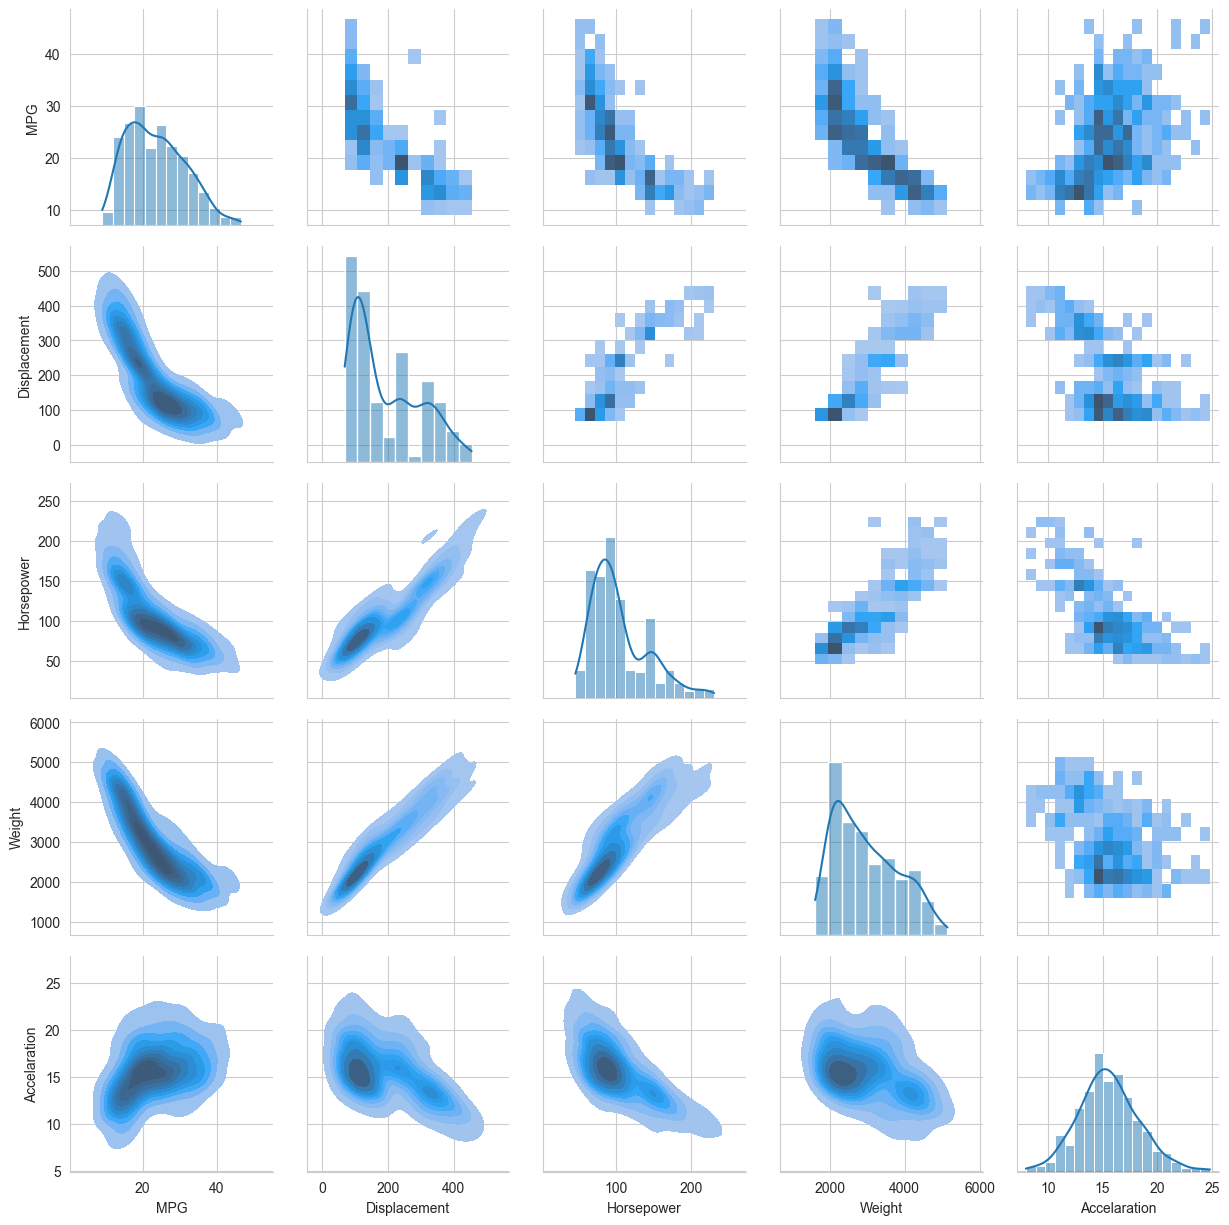

In [41]:
g = sns.PairGrid(data[["MPG", "Displacement", "Horsepower", "Weight", "Accelaration"]])
g.map_upper(sns.histplot) 
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

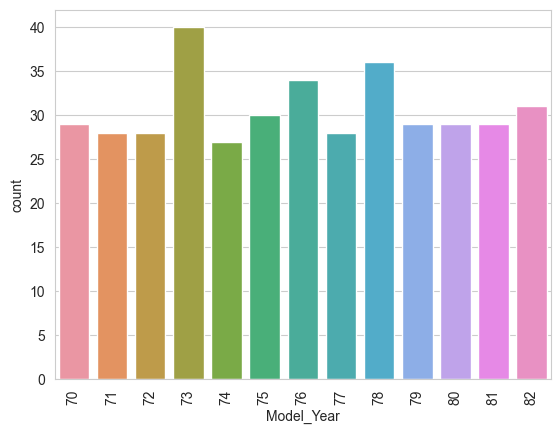

In [42]:
# buraya kod yazacağız
sns.countplot(x="Model_Year", data=data)
plt.xticks(rotation = 90)
plt.show()

## Preprocessing

In [43]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [44]:
categorical_variables = ["Cylinders", "Model_Year", "Origin", "Car_Name"]
for i in categorical_variables:
    print(f"For {i} column ")
    data[f"{i}"] = labelEncoder(data[f"{i}"])
    print("**********************************")

For Cylinders column 
Encoding Approach:
8  ==>  4
4  ==>  1
6  ==>  3
3  ==>  0
5  ==>  2
**********************************
For Model_Year column 
Encoding Approach:
70  ==>  0
71  ==>  1
72  ==>  2
73  ==>  3
74  ==>  4
75  ==>  5
76  ==>  6
77  ==>  7
78  ==>  8
79  ==>  9
80  ==>  10
81  ==>  11
82  ==>  12
**********************************
For Origin column 
Encoding Approach:
American  ==>  0
Japanese  ==>  2
European  ==>  1
**********************************
For Car_Name column 
Encoding Approach:
chevrolet chevelle malibu  ==>  49
buick skylark 320  ==>  36
plymouth satellite  ==>  231
amc rebel sst  ==>  14
ford torino  ==>  161
ford galaxie 500  ==>  141
chevrolet impala  ==>  54
plymouth fury iii  ==>  223
pontiac catalina  ==>  241
amc ambassador dpl  ==>  1
dodge challenger se  ==>  101
plymouth 'cuda 340  ==>  215
chevrolet monte carlo  ==>  57
buick estate wagon (sw)  ==>  30
toyota corona mark ii  ==>  274
plymouth duster  ==>  220
amc hornet  ==>  8
ford maverick  =

In [45]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model_Year,Origin,Car_Name
0,18.0,4,307.0,130.0,3504.0,12.0,0,0,49
1,15.0,4,350.0,165.0,3693.0,11.5,0,0,36
2,18.0,4,318.0,150.0,3436.0,11.0,0,0,231
3,16.0,4,304.0,150.0,3433.0,12.0,0,0,14
4,17.0,4,302.0,140.0,3449.0,10.5,0,0,161
...,...,...,...,...,...,...,...,...,...
393,27.0,1,140.0,86.0,2790.0,15.6,12,0,153
394,44.0,1,97.0,52.0,2130.0,24.6,12,1,301
395,32.0,1,135.0,84.0,2295.0,11.6,12,0,119
396,28.0,1,120.0,79.0,2625.0,18.6,12,0,159


In [46]:
# create input and output
X = data.drop('MPG', axis = 1)
y = data['MPG']

In [47]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (338, 8)
y_train: (338,)
X_test: (60, 8)
y_test: (60,)


## Model Training and Evaluation

In [48]:
# import libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# make a function that include all regression models
def allRegressors(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning regressors and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) for each regressors and
    comparison plot for regressors according to RMSE and MAE
    """
    Regressors = [LinearRegression(), SVR(), RandomForestRegressor(), GradientBoostingRegressor(),
                   KNeighborsRegressor(), DecisionTreeRegressor()]
    mae_dict = {}
    mae_scores = []
    rmse_dict = {}
    rmse_scores = []
    
    # function for mean absolute error
    def maeScore(regressor):
        """
        :param regressor: regressor model function
        :return: mean absolute error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        mae_score = mean_absolute_error(y_test, pred)
        return mae_score
    
    # function for root mean square error
    def rmseScore(regressor):
        """
        :param regressor: regressor model function
        :return: root mean score error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, pred))
        return rmse_score
    
    # mean absolute error, root mean square error for each regressors
    for regressor in Regressors:
        name = regressor.__class__.__name__
        mae_dict[name] = maeScore(regressor)
        mae_scores.append(maeScore(regressor))
        rmse_dict[name] = rmseScore(regressor)
        rmse_scores.append(rmseScore(regressor))
        print("*************************************************************************")
        print(f"{name} Mean Absolute Error = {mae_dict[name]}")
        print(f"{name} Root Mean Square Error = {rmse_dict[name]}")
        
    #Plotting the performance of regressors
    def plotPerformance(scores_list, scores_dict, metric:str):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include regressors and evaluation scores
        :param metric: metric name y axis 
        :return: plot of performance comparison of regressors
        """
        
        N = len(Regressors)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Regressors")
        plt.title("Performance Comparison of Regressors")
        plt.ylabel(f"{metric} Error")
        plt.xticks(x,
                   scores_dict.keys(),
                   rotation=90)
        plt.yticks(np.arange(0, np.max(scores_list), np.max(scores_list)/len(scores_list)))
        plt.show()
    
    # call the function
    plotPerformance(mae_scores, mae_dict, "Mean Absolute")
    plotPerformance(rmse_scores, rmse_dict, "Root Mean Square")

*************************************************************************
LinearRegression Mean Absolute Error = 2.5481625096112257
LinearRegression Root Mean Square Error = 3.2822396751864047
*************************************************************************
SVR Mean Absolute Error = 3.3338368786300143
SVR Root Mean Square Error = 4.452943796308263
*************************************************************************
RandomForestRegressor Mean Absolute Error = 2.174933333333333
RandomForestRegressor Root Mean Square Error = 3.0610496647392047
*************************************************************************
GradientBoostingRegressor Mean Absolute Error = 2.3172681572194906
GradientBoostingRegressor Root Mean Square Error = 3.2293450676953683
*************************************************************************
KNeighborsRegressor Mean Absolute Error = 3.2676666666666674
KNeighborsRegressor Root Mean Square Error = 4.35928358028396
*******************************

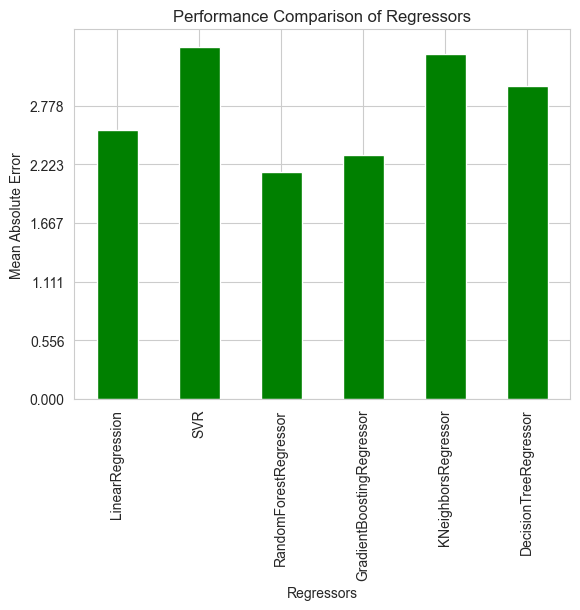

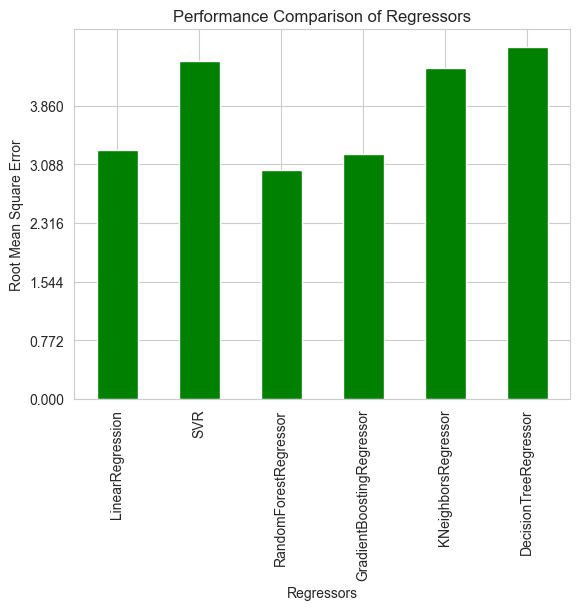

In [49]:
allRegressors(X_train, X_test, y_train, y_test)

## Model Selection and Parameter Tuning

In [50]:
# Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [51]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [52]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 2.1120 degrees.
Accuracy = 89.89%.


In [53]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 2.0392 degrees.
Accuracy = 90.40%.


In [54]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.57%.
